In [1]:
import pandas as pd

In [2]:
train_text_df = pd.read_csv('training_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [ ]:
train_text_df.head(2)

In [4]:
train_text_df.shape

(3321, 2)

In [5]:
#read variant data

In [6]:
train_var_df = pd.read_csv('training_variants', engine='python', header=None, skiprows=1, names=["ID","Gene","Variation","Class"])

In [7]:
train_var_df.head(2)


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2


In [8]:
train_text_df.shape

(3321, 2)

In [9]:
import matplotlib.pyplot as plt


In [10]:
 import numpy  as np

In [11]:
plt.hist(train_var_df["Class"], bins=np.arange(train_var_df["Class"].min(), train_var_df["Class"].max()+1),align='left')

(array([ 568.,  452.,   89.,  686.,  242.,  275.,  953.,   56.]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 <a list of 8 Patch objects>)

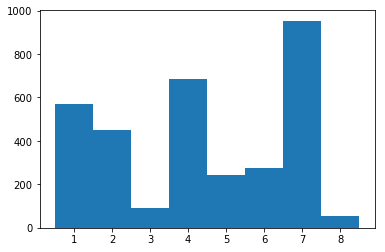

In [12]:
plt.show()

In [13]:
#from the above looks like most frequently occurence cancer  of class 7

In [14]:
#merge variant text and text df 

In [15]:
train_df=train_text_df.merge( train_var_df, on='ID', how='inner') #taken inner as on join it includes the common rows between of because either of one is missing information will not be relevant

In [16]:
print train_df.columns

Index([u'ID', u'Text', u'Gene', u'Variation', u'Class'], dtype='object')


In [17]:
#above data is having five column 

In [18]:
#can not see any punctuation so not removing that 

In [19]:
#Remotrain_dfve stop words 

In [20]:
from nltk.corpus import stopwords

In [21]:
no_of_lines=train_df["Text"].size  #it shound be 3321

In [22]:
text=train_df["Text"]

In [23]:
print text.size

3321


In [24]:
proc_text=[]

In [25]:
 stops = set(stopwords.words("english"))

In [26]:
print stops  #just to take a glipmse of stop  words

set([u'all', u'just', u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u'do', u'them', u'his', u'very', u'they', u'not', u'during', u'now', u'him', u'nor', u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u'where', u'few', u'because', u'doing', u'some', u'hasn', u'are', u'our', u'ourselves', u'out', u'what', u'for', u'while', u're', u'does', u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u'were', u'here', u'shouldn', u'hers', u'by', u'on', u'about', u'couldn', u'of', u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u'mightn', u'wasn', u'your', u'from', u'her', u'their', u'aren', u'there', u'been', u'whom', u'too', u'wouldn', u'themselves', u'weren', u'was', u'until', u'more', u'himself', u'that', u'but', u'don', u'with', u'than', u'those', u'he', u'me', u'myself', u'ma', u'these', u'up', u'will', u'below', u'ain

In [27]:
for i in xrange( 0, no_of_lines):
        words = text[i].lower().split() # split based on space 
        words = [w.lower() for w in words if not w in stops]   # remove the stop words
        proc_text.append(" ".join(words))

In [28]:
print proc_text[3] #just to verify

recent evidence demonstrated acquired uniparental disomy (aupd) novel mechanism pathogenetic mutations cancer may reduced homozygosity. help identify novel mutations myeloproliferative neoplasms (mpns), performed genome-wide single nucleotide polymorphism (snp) screen identify aupd 58 patients atypical chronic myeloid leukemia (acml; n = 30), jak2 mutation–negative myelofibrosis (mf; n = 18), jak2 mutation–negative polycythemia vera (pv; n = 10). stretches homozygous, copy neutral snp calls greater 20mb seen 10 (33%) acml 1 (6%) mf, absent pv. total, 7 different chromosomes involved 7q 11q affected 10% acml cases. cbl mutations identified 3 cases 11q aupd analysis 574 additional mpns revealed total 27 cbl variants 26 patients acml, myelofibrosis chronic myelomonocytic leukemia. variants missense substitutions ring linker domains abrogated cbl ubiquitin ligase activity conferred proliferative advantage 32d cells overexpressing flt3. conclude acquired, transforming cbl mutations novel wi

In [29]:
# stemming

In [30]:
stem_text=[]

In [31]:
from nltk.stem import SnowballStemmer

In [32]:
snowball_stemmer = SnowballStemmer("english")

In [33]:
for line in proc_text:
    word = line.decode('utf-8').split(" ")
    word =[snowball_stemmer.stem(w) for w in word]
    stem_text.append(" ".join(word))
    

    


     
    

In [34]:
print stem_text[3]  #verify the text

recent evid demonstr acquir uniparent disomi (aupd) novel mechan pathogenet mutat cancer may reduc homozygosity. help identifi novel mutat myeloprolif neoplasm (mpns), perform genome-wid singl nucleotid polymorph (snp) screen identifi aupd 58 patient atyp chronic myeloid leukemia (acml; n = 30), jak2 mutation–neg myelofibrosi (mf; n = 18), jak2 mutation–neg polycythemia vera (pv; n = 10). stretch homozygous, copi neutral snp call greater 20mb seen 10 (33%) acml 1 (6%) mf, absent pv. total, 7 differ chromosom involv 7q 11q affect 10% acml cases. cbl mutat identifi 3 case 11q aupd analysi 574 addit mpns reveal total 27 cbl variant 26 patient acml, myelofibrosi chronic myelomonocyt leukemia. variant missens substitut ring linker domain abrog cbl ubiquitin ligas activ confer prolif advantag 32d cell overexpress flt3. conclud acquired, transform cbl mutat novel widespread pathogenet abnorm morpholog related, clinic aggress mpns. introduct myeloprolif neoplasm (mpns) clonal hematopoiet stem 

In [35]:
#now tf idf 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer(sublinear_tf=True) #already removed stop words

In [38]:
 tfIdf_matrix=vectorizer.fit_transform(stem_text)

In [39]:
type(tfIdf_matrix)

scipy.sparse.csr.csr_matrix

In [40]:
tfIdf_matrix.shape
tfIdf_matrix.nnz

4853308

In [41]:
feature_names = vectorizer.get_feature_names() 

In [42]:
print len(feature_names)

153750


In [43]:
#feature_names[153700:153750]
print tfIdf_matrix[1]

  (0, 49391)	0.012549889267
  (0, 83442)	0.026119957285
  (0, 121649)	0.0168593595944
  (0, 39311)	0.0244520361358
  (0, 104748)	0.0216886473751
  (0, 21686)	0.0255872496093
  (0, 76454)	0.0225307167414
  (0, 114527)	0.0170645268686
  (0, 150432)	0.0103428681211
  (0, 129799)	0.0240065419925
  (0, 78110)	0.0246209557695
  (0, 57243)	0.00833461804578
  (0, 104622)	0.0158768678642
  (0, 33770)	0.0175728568428
  (0, 36450)	0.0316922712921
  (0, 39151)	0.0207118387978
  (0, 95800)	0.0124885209552
  (0, 21793)	0.0188527495551
  (0, 65647)	0.00900931496208
  (0, 62376)	0.0213991039347
  (0, 121874)	0.0154325462535
  (0, 49191)	0.0186216183865
  (0, 115118)	0.0211832562615
  (0, 149907)	0.0118349379664
  (0, 97597)	0.0362787611268
  :	:
  (0, 10905)	0.00913549467411
  (0, 55774)	0.0240251622089
  (0, 73337)	0.0133943095963
  (0, 116808)	0.00974469471631
  (0, 128893)	0.0108306692416
  (0, 145500)	0.0102715842563
  (0, 134365)	0.0146739877429
  (0, 66011)	0.0117897647627
  (0, 54736)	0.0130174

In [44]:
from sklearn.feature_selection import SelectFromModel

In [45]:
from sklearn.feature_selection import SelectKBest

In [46]:
from sklearn.feature_selection import chi2   #feature by chi-Square

In [47]:
chi2_model = SelectKBest(chi2,k=5000)

In [48]:
 ch_dtm = chi2_model.fit_transform(tfIdf_matrix,train_df["Class"])

In [49]:
#feature by Information Gain

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [51]:
from sklearn import tree
from sklearn.decomposition import TruncatedSVD

In [52]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [53]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

C:\Users\Ravi\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
  treeCL = tree.DecisionTreeClassifier(criterion="entropy")

In [55]:
 treeCL = treeCL.fit(tfIdf_matrix,train_df["Class"])

In [56]:
 transformed_features = SelectFromModel(treeCL,prefit=True).transform(tfIdf_matrix)

In [57]:
#Fetaure reduction by LSA

In [58]:
  svd = TruncatedSVD(n_components=100)

In [59]:
normalizer =  Normalizer(copy=False)

In [60]:
lsa = make_pipeline(svd, normalizer)

In [61]:
 dtm_lsa = lsa.fit_transform(tfIdf_matrix)

In [62]:
#cross validate 

In [63]:
def crossValidate(document_term_matrix,labels,classifier="SVM",nfold=10):
    clf = None
    precision = []
    recall = []
    fscore = []
    
    if classifier == "RF":
        clf = RandomForestClassifier()
    elif classifier == "NB":
        clf = MultinomialNB()
    elif classifier == "SVM":
        clf = LinearSVC()
    
    skf = StratifiedKFold(labels, n_folds=nfold)

    for train_index, test_index in skf:
        X_train, X_test = document_term_matrix[train_index], document_term_matrix[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        precision.append(p)
        recall.append(r)
        fscore.append(f)
        
    return round(np.mean(precision),3),round(np.mean(recall),3),round(np.mean(fscore),3)

In [64]:
precision, recall, fscore = crossValidate(ch_dtm,train_df["Class"],"SVM",10)

C:\Users\Ravi\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
print precision, recall, fscore

0.458 0.478 0.435


In [66]:
precision_nb, recall_nb, fscore_nb = crossValidate(ch_dtm,train_df["Class"],"NB",10)

In [67]:
print precision_nb, recall_nb, fscore_nb

0.335 0.424 0.323


In [68]:
precision_rf, recall_rf, fscore_rf = crossValidate(ch_dtm,train_df["Class"],"RF",10)

In [69]:
print precision_rf, recall_rf, fscore_rf

0.44 0.453 0.433


In [74]:
precision_tr_svm, recall_tr_svm, fscore_tr_svm = crossValidate(dtm_lsa,train_df["Class"],"RF",10)

In [75]:
print precision_tr_svm, recall_tr_svm, fscore_tr_svm

0.412 0.412 0.401
